In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)


df= pd.read_csv(r'C:\Users\karim\OneDrive\Escritorio\Jupyter_Notebook\Project_Sport_Betings\atp_data.csv')
df

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,Tarango J.,6,59,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,Luxa P.,73,174,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,Dupuis A.,33,78,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,Arazi H.,206,35,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44703,17,Dubai,Dubai Tennis Championships,2018-03-03,ATP500,Outdoor,Hard,The Final,3,Bautista Agut R.,Pouille L.,23,15,2.0,0.0,Completed,1.65,2.43,1.66,2.20,1835.901543,1842.459807,0.490563
44704,16,Acapulco,Abierto Mexicano,2018-03-03,ATP500,Outdoor,Hard,Semifinals,3,Anderson K.,Donaldson J.,8,59,2.0,1.0,Completed,1.34,3.63,1.30,3.50,1843.576914,1647.967561,0.755103
44705,18,Sao Paulo,Brasil Open,2018-03-03,ATP250,Indoor,Clay,Semifinals,3,Jarry N.,Zeballos H.,73,69,2.0,1.0,Completed,1.85,2.09,1.90,1.90,1588.293069,1619.758421,0.454841
44706,16,Acapulco,Abierto Mexicano,2018-03-04,ATP500,Outdoor,Hard,The Final,3,Del Potro J.M.,Anderson K.,9,8,2.0,0.0,Completed,1.52,2.75,1.50,2.62,1966.532849,1851.413609,0.659862


In [3]:
df.isna().sum()

ATP               0
Location          0
Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Winner            0
Loser             0
WRank             0
LRank             0
Wsets           187
Lsets           187
Comment           0
PSW           11965
PSL           11965
B365W          5671
B365L          5651
elo_winner        0
elo_loser         0
proba_elo         0
dtype: int64

In [5]:
df.dtypes

ATP             int64
Location       object
Tournament     object
Date           object
Series         object
Court          object
Surface        object
Round          object
Best of         int64
Winner         object
Loser          object
WRank           int64
LRank           int64
Wsets         float64
Lsets         float64
Comment        object
PSW           float64
PSL           float64
B365W         float64
B365L         float64
elo_winner    float64
elo_loser     float64
proba_elo     float64
dtype: object

In [3]:
df['DiffRank_Winner'] = df['LRank']-df['WRank']
df['DiffRank_Loser'] = df['WRank']-df['LRank']
df['DiffElo_Winner'] = df['elo_loser']-df['elo_winner']
df['DiffElo_Loser'] = df['elo_winner']-df['elo_loser']

df['tar_val_Winner']=1
df['tar_val_Loser']=0

In [4]:
#'US Open','French Open','Wimbledon','Australian Open'

df['grand_slams'] = df['Tournament'].apply(lambda x: 'US Open' if x == 'US Open' 
                                          else ('French Open' if x == 'French Open' 
                                                else ('Wimbledon' if x == 'Wimbledon' 
                                                      else ('Australian Open' if x == 'Australian Open' 
                                                            else 'Other'))))

In [5]:
df_winner = df.filter(['Tournament', 'grand_slams', 'Series', 'Surface', 
                       'Winner', 'WRank', 'DiffRank_Winner', 'B365W', 'elo_winner', 'DiffElo_Winner',
                       'tar_val_Winner'])
df_winner.rename(columns={'Winner': 'Player', 'WRank': 'Rank', 'DiffRank_Winner': 'DiffRank',
                          'B365W':'B365', 'elo_winner':'elo', 'DiffElo_Winner':'DiffElo', 'tar_val_Winner':'target_variable'}, inplace=True)
df_winner.head()

,Tournament,grand_slams,Series,Surface,Player,Rank,DiffRank,B365,elo,DiffElo,target_variable
0,Australian Hardcourt Championships,Other,International,Hard,Dosedel S.,63,14,NaN,1500.0,0.0,1
1,Qatar Open,Other,International,Hard,Kiefer N.,6,53,NaN,1500.0,0.0,1
2,Qatar Open,Other,International,Hard,Gaudio G.,73,101,NaN,1500.0,0.0,1
3,Qatar Open,Other,International,Hard,El Aynaoui Y.,33,45,NaN,1500.0,0.0,1
4,Qatar Open,Other,International,Hard,Cherkasov A.,206,-171,NaN,1500.0,0.0,1


In [6]:
df_loser = df.filter(['Tournament', 'grand_slams', 'Series', 'Surface',
                      'Loser', 'LRank', 'DiffRank_Loser', 'B365L', 'elo_loser', 'DiffElo_Loser',
                      'tar_val_Loser'])
df_loser.rename(columns={'Loser': 'Player', 'LRank': 'Rank', 'DiffRank_Loser': 'DiffRank',
                         'B365L':'B365', 'elo_loser':'elo', 'DiffElo_Loser':'DiffElo', 'tar_val_Loser':'target_variable'}, inplace=True)
df_loser.head()

,Tournament,grand_slams,Series,Surface,Player,Rank,DiffRank,B365,elo,DiffElo,target_variable
0,Australian Hardcourt Championships,Other,International,Hard,Ljubicic I.,77,-14,NaN,1500.0,0.0,0
1,Qatar Open,Other,International,Hard,Tarango J.,59,-53,NaN,1500.0,0.0,0
2,Qatar Open,Other,International,Hard,Luxa P.,174,-101,NaN,1500.0,0.0,0
3,Qatar Open,Other,International,Hard,Dupuis A.,78,-45,NaN,1500.0,0.0,0
4,Qatar Open,Other,International,Hard,Arazi H.,35,171,NaN,1500.0,0.0,0


In [7]:
df_final = pd.concat([df_winner, df_loser], ignore_index=True, sort=False)
df_final.rename(columns={'Tournament':'tournament',
                         'Series':'series','Surface':'surface',
                         'Player':'player', 'Rank':'rank', 'DiffRank':'diff_rank',
                         'DiffElo':'diff_elo'}, inplace=True)
df_final.head(10)

,tournament,grand_slams,series,surface,player,rank,diff_rank,B365,elo,diff_elo,target_variable
0,Australian Hardcourt Championships,Other,International,Hard,Dosedel S.,63,14,NaN,1500.0,0.0,1
1,Qatar Open,Other,International,Hard,Kiefer N.,6,53,NaN,1500.0,0.0,1
2,Qatar Open,Other,International,Hard,Gaudio G.,73,101,NaN,1500.0,0.0,1
3,Qatar Open,Other,International,Hard,El Aynaoui Y.,33,45,NaN,1500.0,0.0,1
4,Qatar Open,Other,International,Hard,Cherkasov A.,206,-171,NaN,1500.0,0.0,1
5,Qatar Open,Other,International,Hard,Caratti C.,211,8,NaN,1500.0,0.0,1
6,Qatar Open,Other,International,Hard,Berasategui A.,60,1940,NaN,1500.0,0.0,1
7,Qatar Open,Other,International,Hard,Bastl G.,85,-49,NaN,1500.0,0.0,1
8,Gold Flake Open,Other,International,Hard,Hantschk M.,128,-114,NaN,1500.0,0.0,1
9,Gold Flake Open,Other,International,Hard,Golmard J.,38,66,NaN,1500.0,0.0,1


In [11]:
df_final.dtypes

tournament          object
grand_slams         object
series              object
surface             object
player              object
rank                 int64
diff_rank            int64
B365               float64
elo                float64
diff_elo           float64
target_variable      int64
dtype: object

In [12]:
display(df_final.isna().sum())

df_final.describe()

tournament             0
grand_slams            0
series                 0
surface                0
player                 0
rank                   0
diff_rank              0
B365               11322
elo                    0
diff_elo               0
target_variable        0
dtype: int64

,rank,diff_rank,B365,elo,diff_elo,target_variable
count,89416.000000,89416.00000,78094.000000,89416.000000,8.941600e+04,89416.000000
mean,76.416894,0.00000,2.686848,1646.389416,5.207807e-15,0.500000
std,104.461638,142.71112,2.735366,164.303627,1.931425e+02,0.500003
min,0.000000,-1991.00000,1.000000,1318.945207,-9.419087e+02,0.000000
25%,24.000000,-41.00000,1.380000,1519.497837,-1.148591e+02,0.000000
50%,53.000000,0.00000,1.830000,1615.703895,0.000000e+00,0.500000
75%,92.000000,41.00000,2.870000,1732.713699,1.148591e+02,1.000000
max,2000.000000,1991.00000,101.000000,2392.595567,9.419087e+02,1.000000


### Missing Values

In [8]:
df_final['B365'].fillna(0, inplace=True)

In [11]:
#numerical_columns = ['best_of',
#                     'rank', 'diff_rank', 'B365',
#                     'elo', 'diff_elo']

#for col in numerical_columns:
#    X_train[col] = X_train[col].fillna(X_train[col].median())
#    X_test[col] = X_test[col].fillna(X_train[col].median())


#categorical_columns = ['location', 'tournament',
#                       'date', 'series', 'court', 'surface',
#                      'rounds', 'player']

#for col in categorical_columns:
#    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
#    X_test[col] = X_test[col].fillna(X_train[col].mode()[0])

#numerical_columns = ['B365']

#for col in numerical_columns:
#    X_train[col] = X_train[col].fillna(X_train[col].median())
#    X_test[col] = X_test[col].fillna(X_train[col].median())

This bar plot represents the top 10 players on the x-axis and the number of wins on the y-axis. Each bar represents a player and the height of the bar represents the number of tournaments that player has won.

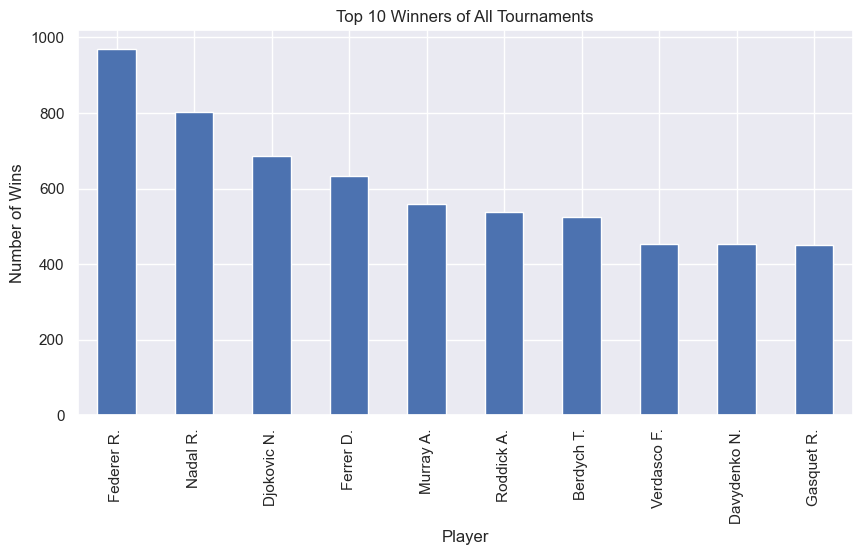

In [9]:
# Filter the players who are winners
winners = df_final[df_final['target_variable'] == 1]

# Count the number of wins for each player
win_counts = winners['player'].value_counts()

# Get the top 10 winners
top_winners = win_counts.nlargest(10)

# Plot the top 10 winners
plt.figure(figsize=(10,5))
top_winners.plot(kind='bar')
plt.title('Top 10 Winners of All Tournaments')
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.show();

This code will create a bar plot for each grand slam with the top 10 players on the x-axis and the number of wins on the y-axis. Each bar represents a player and the height of the bar represents the number of tournaments that player has won.

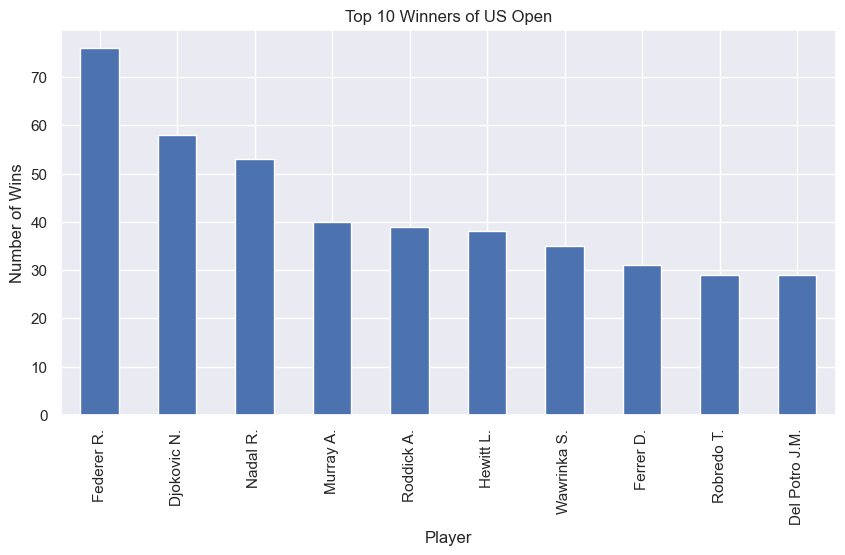

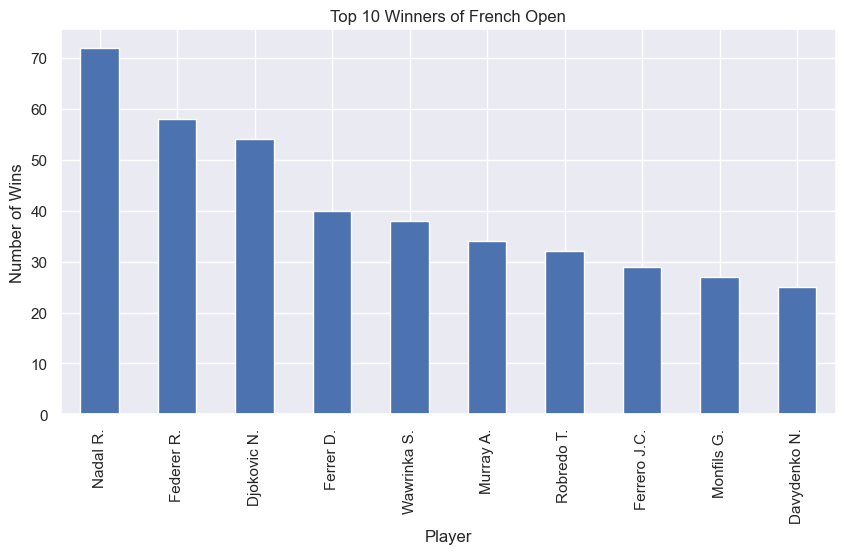

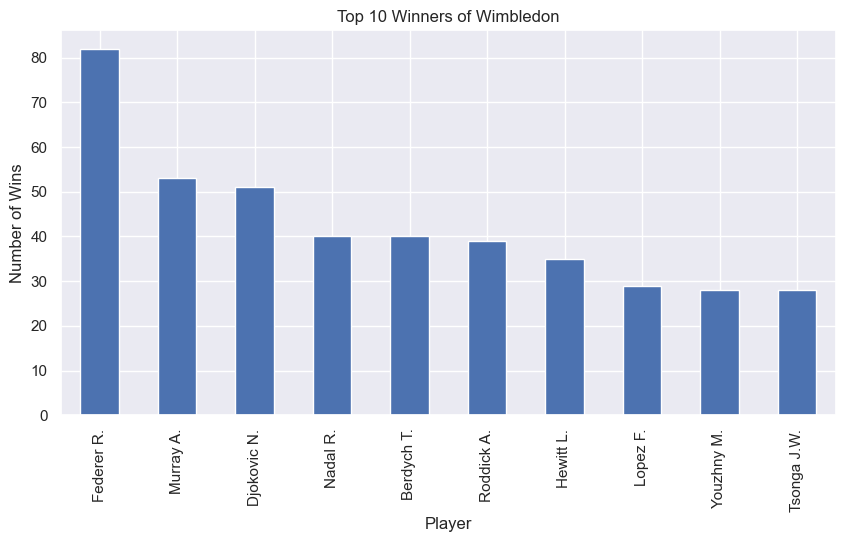

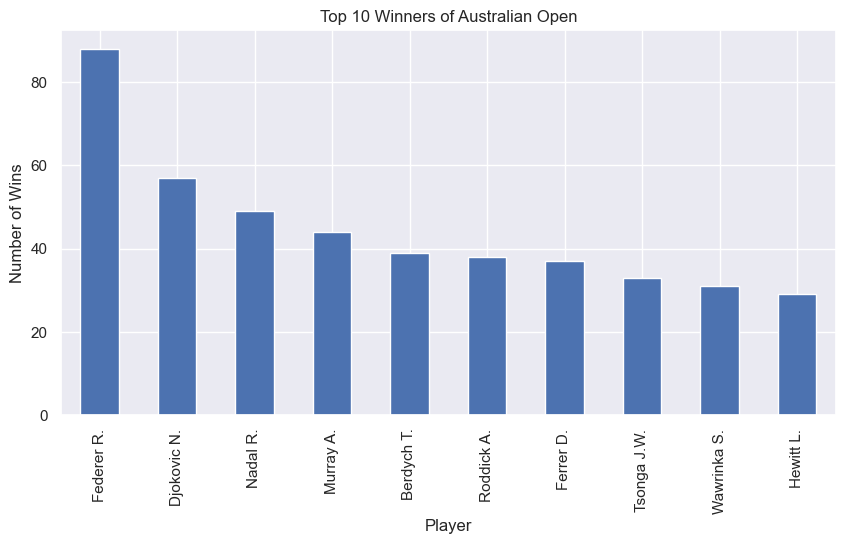

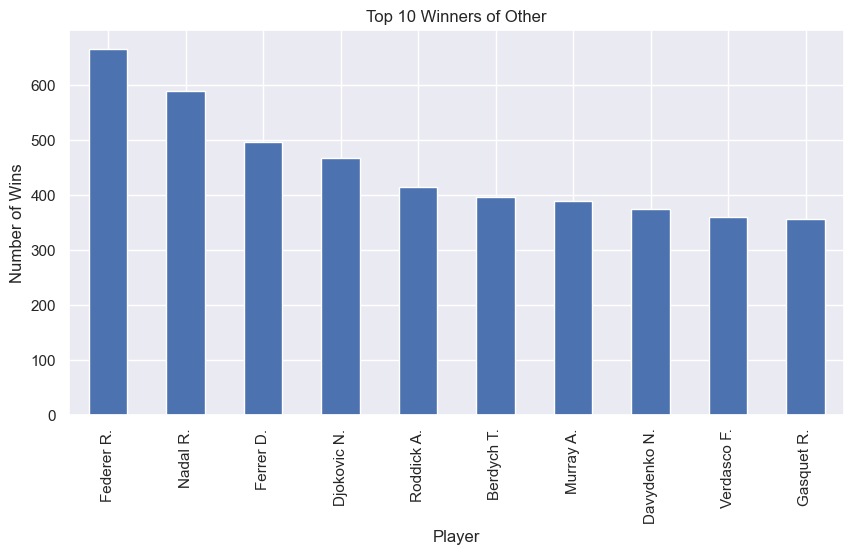

In [11]:
winners = df_final[df_final['target_variable'] == 1]

# For each grand slam, get the top 10 players
grand_slams = ['US Open', 'French Open', 'Wimbledon', 'Australian Open', 'Other']
for gs in grand_slams:
    gs_winners = winners[winners['grand_slams'] == gs]
    win_counts = gs_winners['player'].value_counts()
    top_winners = win_counts.nlargest(10)
    
    # Plot the top 5 winners
    plt.figure(figsize=(10,5))
    top_winners.plot(kind='bar')
    plt.title(f'Top 10 Winners of {gs}')
    plt.xlabel('Player')
    plt.ylabel('Number of Wins')
    plt.show();


This code first filters the top 5 players in each Grand Slam event based on the number of matches they played. Then it calculates the win rate for each player on each surface at each Grand Slam event. The win rate is calculated as the number of matches won divided by the total number of matches played. Finally, it creates a bar plot for each Grand Slam event showing the win rate for each player on each surface. The players are differentiated by different colors in the plot. The x-axis represents the court surfaces and the y-axis represents the win rate. Each facet represents a Grand Slam event. The legend shows the color corresponding to each player.

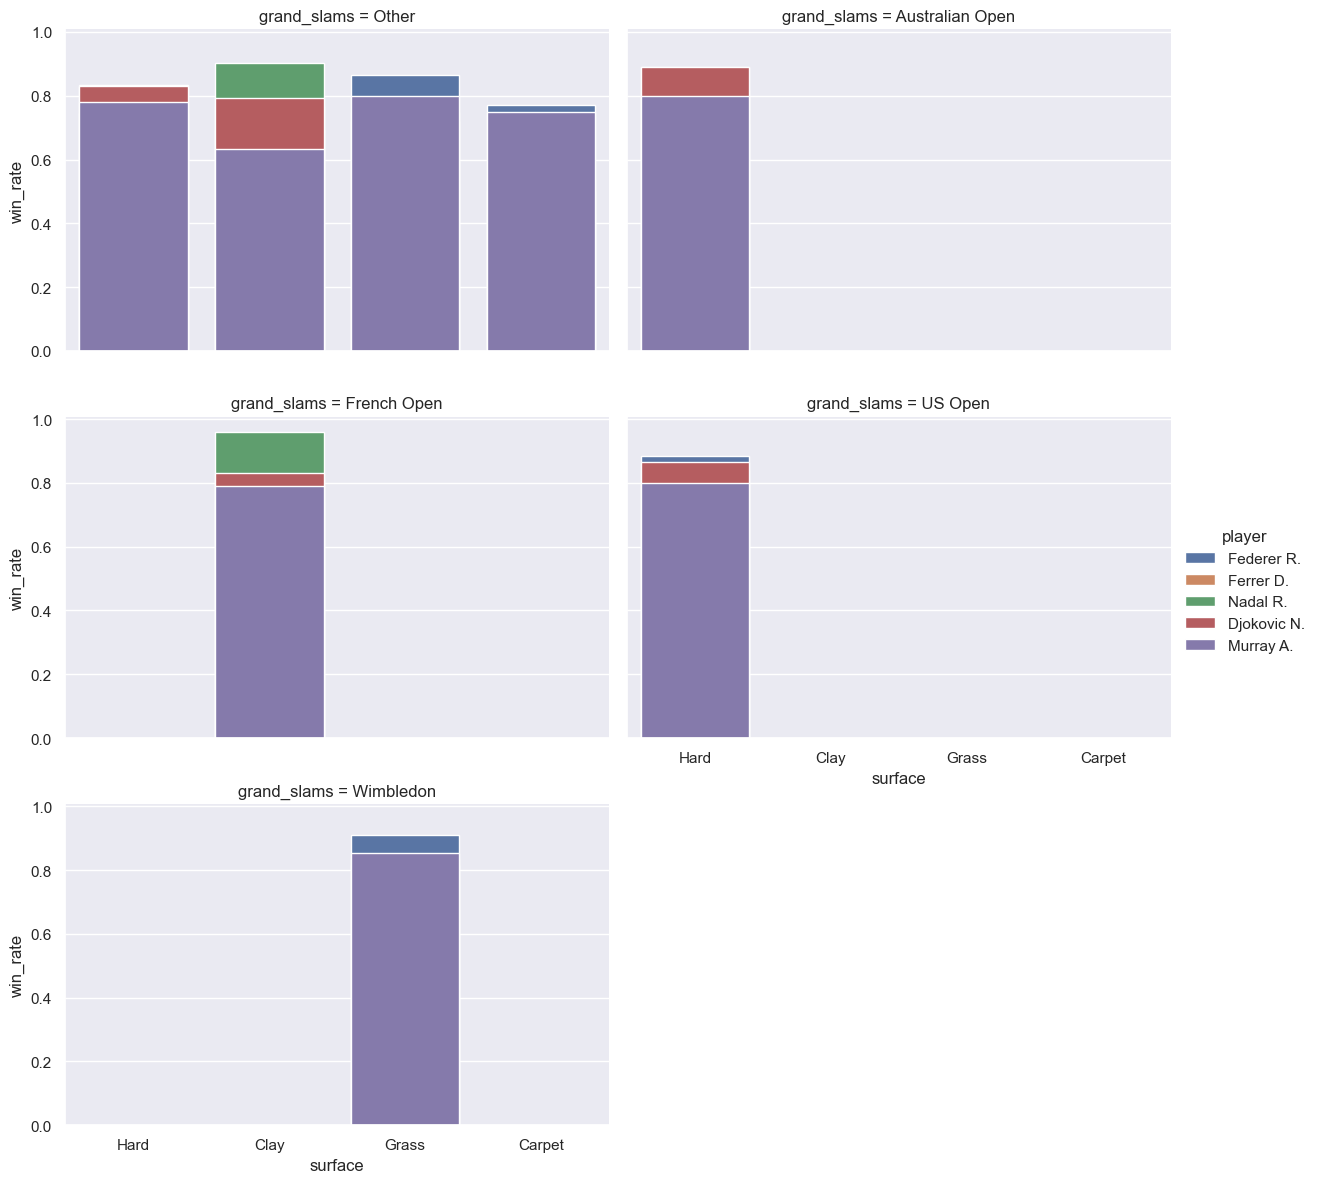

In [24]:
# Filter top 5 players in each grand_slam
top_players = df_final.groupby('grand_slams')['player'].value_counts().groupby('grand_slams').nlargest(3).reset_index(level=0, drop=True).index.get_level_values('player').unique()

df_top_players = df_final[df_final['player'].isin(top_players)].copy()

# Calculate win rate
df_top_players.loc[:, 'win_rate'] = df_top_players.groupby(['player', 'grand_slams', 'surface'])['target_variable'].transform('mean')

# Remove duplicate rows
df_top_players = df_top_players.drop_duplicates(subset=['player', 'grand_slams', 'surface'])

# Create a FacetGrid object
g = sns.FacetGrid(df_top_players, col="grand_slams", hue="player", col_wrap=2, height=4, aspect=1.5)

# Map the bar plot to each facet
g.map(sns.barplot, "surface", "win_rate", order=["Hard", "Clay", "Grass", "Carpet"])

# Add a legend
g.add_legend()

plt.show();


### Train test split

In [13]:
X = df_final.drop('target_variable', axis=1)
y = df_final['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

print("Train Set:", X_train.shape)
print("Test Set:", X_test.shape)

Train Set: (71532, 10)
Test Set: (17884, 10)


In [14]:
display(X_train.isna().sum())

tournament     0
grand_slams    0
series         0
surface        0
player         0
rank           0
diff_rank      0
B365           0
elo            0
diff_elo       0
dtype: int64

### Encoding categorical variables

Label Encoding for ordinal columns:
- Series/ Court/ Surface/ Rounds

One Hot Encoding for non-ordinal columns:
- Location/ Tournament/ Date/ Player

In [16]:
#pd.set_option('display.max_rows', None)
df_final.surface.value_counts()

Hard      47598
Clay      28940
Grass      9832
Carpet     3046
Name: surface, dtype: int64

In [16]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# series, court, surface, rounds are ordinal categorical variable : replace categories with numbers and keep the order
#X_train['series'] = X_train['series'].replace(['International', 'ATP250', 'Grand Slam','Masters','Masters 1000','ATP500',
#                                              'International Gold','Masters Cup'], [0, 1, 2, 3, 4, 5, 6, 7])

#X_train['court'] = X_train['court'].replace(['Outdoor', 'Indoor'], [0, 1])

#X_train['rounds'] = X_train['rounds'].replace(['1st Round', '2nd Round', 'Quarterfinals','3rd Round','Semifinals','The Final',
#                                              '4th Round','Round Robin'], [0, 1, 2, 3, 4, 5, 6, 7])

X_train['grand_slams'] = X_train['grand_slams'].replace(['US Open','French Open','Wimbledon','Australian Open', 'Other'],
                                                        [0, 1, 2, 3, 4])

X_train['surface'] = X_train['surface'].replace(['Hard', 'Clay', 'Grass','Carpet'], [0, 1, 2, 3])

# Position is a nominal categorical variable, it is preferable to use one-hot-encoding
X_train = pd.get_dummies(X_train)

# Apply SAME transformations to the testing set
#X_test['series'] = X_test['series'].replace(['International', 'ATP250', 'Grand Slam','Masters','Masters 1000','ATP500',
#                                              'International Gold','Masters Cup'], [0, 1, 2, 3, 4, 5, 6, 7])

#X_test['court'] = X_test['court'].replace(['Outdoor', 'Indoor'], [0, 1])

#X_test['rounds'] = X_test['rounds'].replace(['1st Round', '2nd Round', 'Quarterfinals','3rd Round','Semifinals','The Final',
#                                              '4th Round','Round Robin'], [0, 1, 2, 3, 4, 5, 6, 7])

X_test['grand_slams'] = X_test['grand_slams'].replace(['US Open','French Open','Wimbledon','Australian Open', 'Other'],
                                                        [0, 1, 2, 3, 4])

X_test['surface'] = X_test['surface'].replace(['Hard', 'Clay', 'Grass','Carpet'], [0, 1, 2, 3])

X_test = pd.get_dummies(X_test)

In [17]:
X_train

grand_slams  surface  rank  diff_rank   B365          elo    diff_elo  \
0                4        0    26         48  1.300  1755.665119 -247.457331   
1                1        1    40        -13  4.000  1592.070713   51.947431   
2                1        1    26         54  1.444  1619.533873 -128.167092   
3                4        0    39         -9  2.620  1777.507654  -37.902674   
4                4        0    96          5  2.370  1468.326770   53.438859   
...            ...      ...   ...        ...    ...          ...         ...   
71527            3        0    83         11  2.500  1543.892076 -159.738282   
71528            4        0    42         75  1.440  1690.853105 -149.159019   
71529            4        1    77         -6  1.667  1562.815359 -127.592904   
71530            4        0    42        109  0.000  1537.471207   26.556451   
71531            4        2    76        -55  1.500  1703.260480  165.483050   

       tournament_AAPT Championships  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   
...                              ...   
71527                              0   
71528                              0   
71529                              0   
71530                              0   
71531                              0   

       tournament_ABN AMRO World Tennis Tournament  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
71527                                            0   
71528                                            0   
71529                                            0   
71530                                            0   
71531                                            0   

       tournament_AEGON Championships  tournament_AEGON International  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   
...                               ...                             ...   
71527                               0                               0   
71528                               0                               0   
71529                               0                               0   
71530                               0                               0   
71531                               0                               0   

       tournament_AEGON Open  tournament_AIG Japan Open Tennis Championships  \
0                          0                                               0   
1                          0                                               0   
2                          0                                               0   
3                          0                                               0   
4                          0                                               0   
...                      ...                                             ...   
71527                      0                                               0   
71528                      0                                               0   
71529                      0                                               0   
71530                      0                                               0   
71531                      0                                               0   

       tournament_ASB Classic  tournament_ATP Buenos Aires 2004  \
0          

### Feature Scaling

In [18]:
missing_columns = X_train.columns.difference(X_test.columns)
missing_data = pd.DataFrame(0, index=X_test.index, columns=missing_columns)
X_test = pd.concat([X_test, missing_data], axis=1)

X_test = X_test[X_train.columns]

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelling

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Accuracy score of the Logistic Regression Model : ",
      lr.score(X_test, y_test))

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Accuracy score of the Decision Tree Model : ",
      dt.score(X_test, y_test))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy score of the Random Forest Model : ",
      rf.score(X_test, y_test))

Accuracy score of the Logistic Regression Model :  0.6712704093044062
Accuracy score of the Decision Tree Model :  0.6108253187206442
Accuracy score of the Random Forest Model :  0.6778125698948781


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Accuracy score of the K Neighbors Classifier : ", knn.score(X_test, y_test))

svm = SVC()
svm.fit(X_train, y_train)
print("Accuracy score of the Support Vector Machine : ", svm.score(X_test, y_test))

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("Accuracy score of the XGB Classifier : ", xgb.score(X_test, y_test))


Accuracy score of the K Neighbors Classifier :  0.62625810780586


### Optimisation of hyperparameters

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=123)
parameters = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2]}
grid_rf = GridSearchCV(estimator=rf, param_grid=parameters, error_score='raise', cv=3, n_jobs=-1)

grid_rf.fit(X_train[:1000], y_train[:1000])
print("Best parameters: {}".format(grid_rf.best_params_))
print("Random forest score: {}".format(grid_rf.score(X_test, y_test)))

y_pred_rf = grid_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

pd.crosstab(y_test, y_pred_rf, rownames=['True Class'], colnames=['Predicted by RF'])

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Random forest score: 0.6684186982777902
              precision    recall  f1-score   support

           0       0.71      0.57      0.63      8999
           1       0.64      0.77      0.70      8885

    accuracy                           0.67     17884
   macro avg       0.68      0.67      0.67     17884
weighted avg       0.68      0.67      0.67     17884



Predicted by RF,0,1
True Class,,
0,5145,3854
1,2076,6809


In [21]:
lr = LogisticRegression(random_state=123, C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                        penalty='l2', solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_lr = GridSearchCV(estimator=lr, param_grid=parameters, error_score='raise', cv=3, n_jobs=-1)

grid_lr.fit(X_train[:1000], y_train[:1000])
print("Best parameters: {}".format(grid_lr.best_params_))
print("Logistic Regression score: {}".format(grid_lr.score(X_test, y_test)))

y_pred_lr = grid_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

pd.crosstab(y_test, y_pred_lr, rownames=['True Class'], colnames=['Predicted by LR'])


Best parameters: {'C': 0.01}
Logistic Regression score: 0.6686982777902035
              precision    recall  f1-score   support

           0       0.70      0.59      0.64      8999
           1       0.64      0.75      0.69      8885

    accuracy                           0.67     17884
   macro avg       0.67      0.67      0.67     17884
weighted avg       0.67      0.67      0.67     17884



Predicted by LR,0,1
True Class,,
0,5312,3687
1,2238,6647


### Customised evaluation metric

In [22]:
alpha_train = X_train["grand_slams"] * X_train["rank"]
alpha_test = X_test["grand_slams"] * X_test["rank"]

def compute_score(y, preds, alpha):
    maxi = np.where(alpha > 1, alpha, 1).sum()
    return (1 - (((preds > y).sum() + alpha[preds < y].sum())/maxi))

In [23]:
y_pred_test = grid_rf.predict(X_train)
y_pred_test = pd.Series(y_pred_test)

pd.crosstab(y_test, y_pred_test, colnames = ['Actual Class'], rownames = ['Predicted Class'])


Actual Class,0,1
Predicted Class,,
0,3550,5449
1,3581,5304


### Model Persistence

In [24]:
from joblib import dump, load

dump(grid_rf, 'md.joblib')

['md.joblib']

In [25]:
loaded_model = load('md.joblib')

loaded_model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)